In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("/home/Ima/work/Dataset/Cycle-2/Iris.csv")

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = df.drop(['Id', 'Species'], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

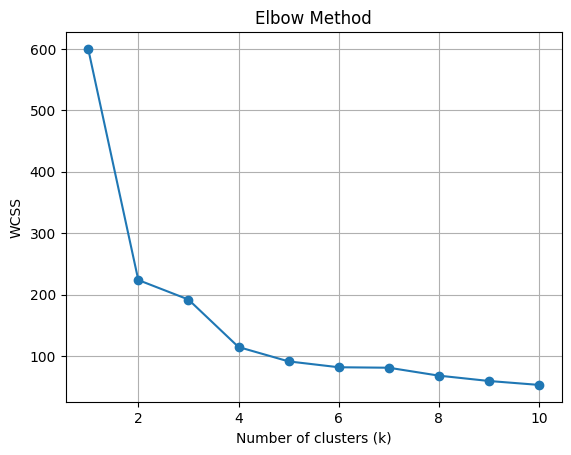

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

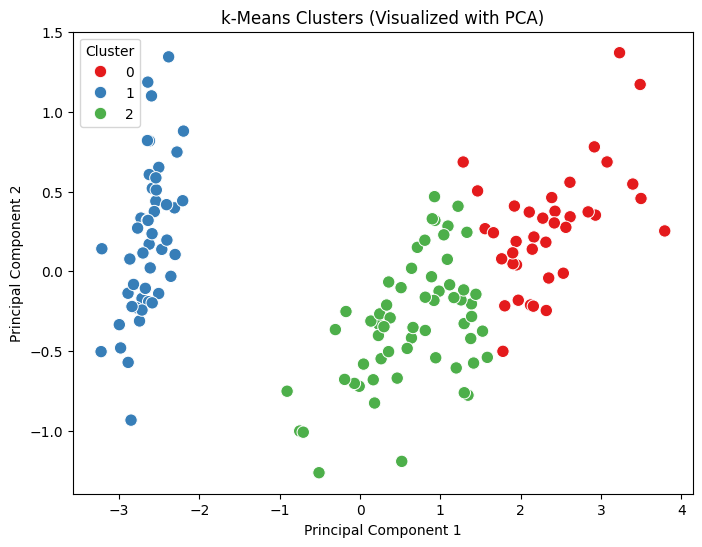

In [7]:
import seaborn as sns
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df["PC1"] = principal_components[:, 0]
df["PC2"] = principal_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=80)
plt.title("k-Means Clusters (Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

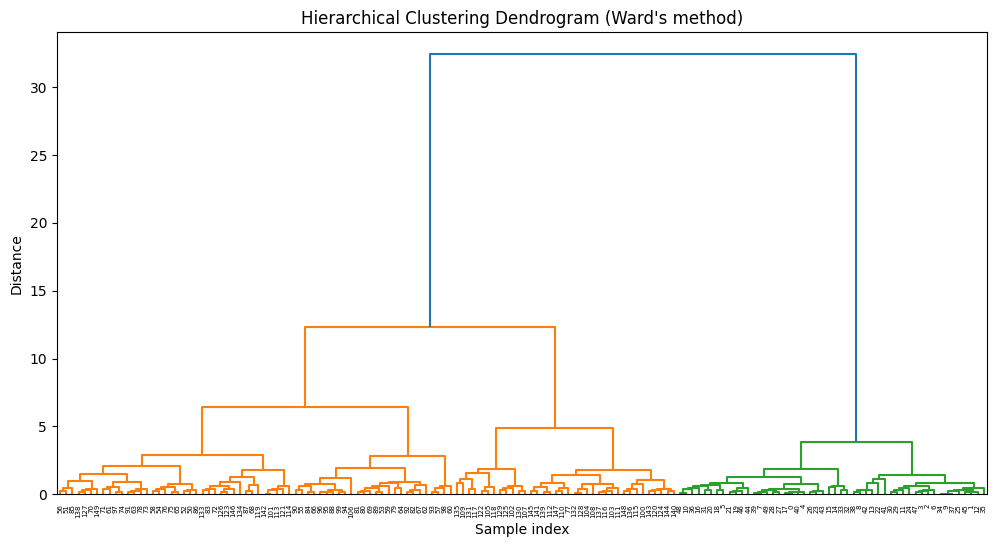

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

X = df.drop(columns=["Id", "Species", "Cluster", "PC1", "PC2"])

linked = linkage(X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Ward's method)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


- **Customer Segmentation**: Businesses can cluster customers into groups based on their purchasing behavior, allowing targeted marketing and personalization.
- **Medical Diagnosis**: Grouping patients with similar symptoms or test results to identify diseases or recommend treatments.
- **Image Compression**: Clustering pixel colors in an image to reduce color diversity and compress the image.